# <font size=14> Women and Child Health: Analysis of NFHS-4 Data </font>
National Family Health Survey, 4 (2015-2016) - India

- Data for this project has been taken from https://data.gov.in/
- Link to the dataset: https://data.gov.in/catalog/key-indicators-national-family-health-survey-nfhs
<br> </br>



# <font size=10> Data Analysis - Factors Affecting Child Stunting </font>



# 1. Correlation Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

#load normalised data 
df = pd.read_csv('./../Data/working_data/normalised_data_6.csv')
df.drop(df.columns[[0]], axis = 1, inplace = True) 

pd.set_option('display.max_columns', 30)
df.corr()['68. Children under 5 years who are stunted11 (%)']

Households surveyed                                                                              0.030930
Women age 15-49 years interviewed                                                                0.081941
Men age 15-49 years interviewed                                                                 -0.032857
1. Population (female) age 6+ years who ever attended school (%)                                -0.581936
3. Sex ratio of the total population (females per 1000 males)                                    0.044730
4. Sex ratio at birth for children born in the last five years (females per 1000 males)         -0.004436
7. Households with an improved drinking-water source1 (%)                                        0.058407
8. Households using improved sanitation facility2 (%)                                           -0.620421
9. Households using clean fuel for cooking3 (%)                                                 -0.531430
12. Women who are literate (%)                

In [44]:
attributes_stunting = ['1. Population (female) age 6+ years who ever attended school (%)' , 
                       '3. Sex ratio of the total population (females per 1000 males)' , 
                       '7. Households with an improved drinking-water source1 (%)' , 
 '8. Households using improved sanitation facility2 (%)' , 
 '9. Households using clean fuel for cooking3 (%)' ,
 '12. Women who are literate (%)',
 '13. Men who are literate (%)' , 
 '62. Children under age 3 years breastfed within one hour of birth8 (%)',
 '65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)',
 '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
 '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
 '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
 '79. All women age 15-49 years who are anaemic (%)',
 '14. Women with 10 or more years of schooling (%)',
 '15. Women age 20-24 years married before age 18 years (%)',
 '19. Any modern method (%)',
 '30. Mothers who had at least 4 antenatal care visits (%)',
 '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
 '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
'68. Children under 5 years who are stunted11 (%)'
 ]

In [45]:
len(attributes_stunting)

20

**It can be observed that women literacy rates, education/schooling of females,  mother's BMI , improved sanitation facilities, clean fuel, men literacy rates, breastfeeding practises, antenatal care, contraceptive awareness are correlated with stunting in children**

# 2. DATA ANALYSIS TECHNIQUE: Regression Analysis

To determine risk factors for stunting, all the independent variables will be entered into the regression equation first and a full regression model  with  these variables will be developed. The  p-value was observed for each attribute. Then, a new regression model with all variables with p-values less than a suitable threshold shall be developed. The remaining variables will be discarded. This will be performed recursively until all final variables were significant (p-value < 0.05). We will use the stat models library in Python to perform this analysis

In [46]:
#importing stat models
import statsmodels.api as sm
#loading the dataset

df = df[attributes_stunting]

In [47]:
df

,1. Population (female) age 6+ years who ever attended school (%),3. Sex ratio of the total population (females per 1000 males),7. Households with an improved drinking-water source1 (%),8. Households using improved sanitation facility2 (%),9. Households using clean fuel for cooking3 (%),12. Women who are literate (%),13. Men who are literate (%),62. Children under age 3 years breastfed within one hour of birth8 (%),65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%),67. Total children age 6-23 months receiving an adequate diet9 10 (%),72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%),76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%),79. All women age 15-49 years who are anaemic (%),14. Women with 10 or more years of schooling (%),15. Women age 20-24 years married before age 18 years (%),19. Any modern method (%),30. Mothers who had at least 4 antenatal care visits (%),32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%),47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%),68. Children under 5 years who are stunted11 (%)
0,1.059982,-0.063858,-3.840965,0.573031,-0.688453,0.828432,0.959826,0.951829,0.846757,0.506149,-1.469430,-2.060529,-2.023470,0.060813,-0.406175,-2.001519,-0.474381,-0.866763,-0.263558,-0.115258
1,1.094749,-0.106012,-3.915646,0.577244,-0.603557,0.848194,1.003942,0.981102,0.807316,0.459420,-1.501726,-2.091902,-2.031319,0.108006,-0.383987,-1.989506,-0.419613,-0.861424,-0.178036,-0.175236
2,0.173425,0.385782,-3.818561,0.636217,-1.055049,-0.100413,0.639986,1.420205,1.872223,1.429051,-1.684735,-2.085627,-1.866475,-0.640333,-0.672426,-2.145673,-0.900785,-0.994910,-1.267017,0.274597
3,0.451560,0.526294,-3.751348,0.678340,-0.846668,0.116976,0.728218,1.461187,2.056281,1.744474,-1.587848,-2.085627,-1.882174,-0.370662,-0.650239,-2.103628,-0.685627,-0.781332,-1.016152,0.034686
4,1.033906,-0.021704,-2.855180,0.846835,0.206815,0.900895,1.014971,1.080632,0.662699,0.108950,-1.587848,-2.367984,-2.408107,0.269809,-0.783364,-1.755255,0.339308,-0.583772,-0.554333,0.004697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2.120373,0.048552,-0.472866,0.842623,1.920172,1.697989,0.617928,0.044351,3.673362,3.228127,-1.329482,-1.790722,-2.541552,2.009192,-1.715245,-1.004452,-0.411789,-1.096360,0.107038,-1.604703
1288,0.929606,0.132859,-0.779057,1.162763,-0.781067,1.105109,0.176768,0.582983,1.977399,1.499145,-1.297186,-1.696603,-2.321760,-0.492014,-1.537744,-1.358831,-1.182446,-1.203148,-0.280662,-0.805001
1289,1.624944,0.090706,-0.599823,0.977418,0.808805,1.480599,0.507638,0.313667,2.661043,2.316907,-1.318717,-1.740525,-2.463055,1.078825,-1.663474,-1.154612,-0.771690,-1.144415,-0.075409,-1.204852
1290,0.703621,-0.471344,-1.742438,1.162763,-0.900693,0.340953,0.121623,-0.055179,0.544376,0.494467,-1.652439,-2.568771,-2.470905,-1.038099,0.385184,-1.100554,-1.452372,-1.128396,-0.542930,-0.675049


In [48]:
X = df.copy(deep='True')
# X: independent variable
X = X.drop(columns = ['68. Children under 5 years who are stunted11 (%)'])
Xcpy = X.copy(deep= 'True')
#y: dependent variable
y = df['68. Children under 5 years who are stunted11 (%)']

#convert to numpy
y=y.values
X=X.values

## 2.1 Full Regression Model (All variables)

In [49]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          1.72e-259
Time:                        09:44:40   Log-Likelihood:                -1187.6
No. Observations:                1292   AIC:                             2415.
Df Residuals:                    1272   BIC:                             2518.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.066e-15      0.017   4.15e-13      1.0

**It can be observed that variables x7,x8,x9,x14,x18,x19 have p-values higher than 0.05(=threshold)**

In [50]:
#drop insignificant variables
Xcpy.drop(Xcpy.columns[[6,7,8,13,17,18]], axis = 1, inplace = True) 


### Variables that still remain:

In [51]:

Xcpy.columns

Index(['1. Population (female) age 6+ years who ever attended school (%)',
       '3. Sex ratio of the total population (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '12. Women who are literate (%)',
       '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
       '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
       '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
       '79. All women age 15-49 years who are anaemic (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)'],
      dtype='object')

In [52]:
len(Xcpy.columns)

13

In [53]:
X = Xcpy.copy(deep= 'True')
X=X.values

## 2.2 Second Regression Model (Selected variables)

In [54]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     167.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          1.12e-264
Time:                        09:44:40   Log-Likelihood:                -1190.7
No. Observations:                1292   AIC:                             2409.
Df Residuals:                    1278   BIC:                             2482.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.548e-15      0.017   3.85e-13      1.0

**In this model, no variable has a p-vlaue > 0.05. So we stop here. The variables that remain are:** 

In [55]:

Xcpy.columns

Index(['1. Population (female) age 6+ years who ever attended school (%)',
       '3. Sex ratio of the total population (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '12. Women who are literate (%)',
       '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
       '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
       '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
       '79. All women age 15-49 years who are anaemic (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)'],
      dtype='object')

In [56]:
len(Xcpy.columns)

13

** From the coefficients of regression ('coef'), it can be observed that the following variables are positively related to increased child stunting: x1,x3,x8,x9,x11
- 1. Population (female) age 6+ years who ever attended school (%)
- 7. Households with an improved drinking-water source1 (%)
- 72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)
- 79. All women age 15-49 years who are anaemic (%)
<br> 

The following are negatively related to increased child stunting: x2,x4,x5,x6,x7,x10,x12,x13

- '3. Sex ratio of the total population (females per 1000 males)'
- 8. Households using improved sanitation facility2 (%)'
- '9. Households using clean fuel for cooking3 (%)'
- '12. Women who are literate (%)'
- '67. Total children age 6-23 months receiving an adequate diet9 10 (%)'

However, these results might be biased due to problems of multicollinearity,which is common in multivariate regression.
The effect of these variables will be further studied using clustering analysis and association rule mining.

On the basis of a literature review, a few other, interesting variables have been added to this list of variables so that their effect on child stunting can also be studied. They are:

- '13. Men who are literate (%)'
- '62. Children under age 3 years breastfed within one hour of birth8 (%)'
- '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',








In [57]:
attributes_stunting = ['1. Population (female) age 6+ years who ever attended school (%)',
       '3. Sex ratio of the total population (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '12. Women who are literate (%)',
       '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
       '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
       '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
       '79. All women age 15-49 years who are anaemic (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
              '13. Men who are literate (%)',
'62. Children under age 3 years breastfed within one hour of birth8 (%)',
'32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)']


In [58]:
len(attributes_stunting)

16

**Total number of attributes: 18**

# 2. Clustering Analysis to identify factors that affect child stunting

## 2.1 K-Means Clustering Implementation

In [59]:


#function to assign clusters
def AssignClusters(df,centroids):
  assigned_clusters={}
  N = df.shape[0]
  k = len(centroids.keys())
  for i in range(N):
    distances={}
    for j in range(k):
      distances[j+1]=np.linalg.norm(df.iloc[i].to_numpy()-centroids[j+1])
    minval = min(distances.values())
    res = [k for k, v in distances.items() if v==minval]
    assigned_clusters[i]=res[0]
    distances.clear()

  return assigned_clusters

def centeroidnp(arr):
    length, dim = arr.shape
    return np.array([np.sum(arr[:, i])/length for i in range(dim)])

#function to update centroids
def update(df,l,assigned_clusters):

  N = len(assigned_clusters.keys())
  k = len(l.keys())
  for j in range(k):
    datapoints=[]
    for i in range(N):
      if(assigned_clusters[i]==j+1):
        datapoints.append(df.iloc[i].tolist())
    datapointsArray = np.asarray(datapoints)
    
    l[j+1]=centeroidnp(datapointsArray).tolist()

  return l

#Function to perform K means clustering on the data frame df and the desired number of clusters = num_clusters
def KMeansClustering(df, num_clusters):
    #N is the number of samples
    #D is the number of features
    N, D = df.shape
    
    np.random.seed(450)
    k = num_clusters

    
    # centroids[i] = [x1,x2,x3 . .. . .. . xD]
    centroids = {
    
        i+1 : df.iloc[np.random.randint(0,N)].tolist()
        for i in range(k)

    }
    #centroids contains K randomly selected data points 
  

    #Assign clusters to each data point.
    assigned_clusters=AssignClusters(df,centroids)
 
    #Update Centroids
    centroids=update(df,centroids,assigned_clusters)
    
    #Repeating assignment stage...
    assigned_clusters=AssignClusters(df,centroids)
    
    itr = 0
    while True:
      clusters=assigned_clusters.copy()
    
      centroids = update(df,centroids,assigned_clusters)
        
      assigned_clusters = AssignClusters(df, centroids)
 
      if(clusters==assigned_clusters or itr==1000):
        break
        
      itr+=1

    return list(clusters.values()), list(centroids.values())

## 2.2 Loading the required dataframes

In [60]:
#since dataframe df contained the normalised data, we will load the same into df_normalised. The input for k-means clustering should be normalised
df_normalised = df[attributes_stunting]
df_normalised.columns

Index(['1. Population (female) age 6+ years who ever attended school (%)',
       '3. Sex ratio of the total population (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '12. Women who are literate (%)',
       '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
       '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
       '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
       '79. All women age 15-49 years who are anaemic (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '13. Men who are literate (%)',
       '62. Children under age 3 years breastfed within one hour of birth8 (%)',
       '32. Mothers who consumed 

In [61]:
#load discrete values in df_discrete
df_discrete = pd.read_csv('./../Data/working_data/equal_frequency_discretised_data_7.csv')
df_discrete.drop(df_discrete.columns[[0]], axis = 1, inplace = True) 
stunting_discrete = df_discrete['68. Children under 5 years who are stunted11 (%)'].tolist()


## 2.3 Clustering on the basis of sanitation facilities in household

In [124]:

df_cluster_1 = df_normalised[['8. Households using improved sanitation facility2 (%)'] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
print(cluster_centers)


[[-1.005601471487035], [1.2815651882917285], [0.1215548789574176]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low , high and medium  % households having improved sanitation facilities**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)

In [126]:
dfC0 = df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1.loc[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C2")
print(l)
print(m)
print(h)

l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C3")
print(l)
print(m)
print(h)

C1
0.0755813953488372
0.29651162790697677
0.627906976744186
C2
0.6530054644808743
0.28415300546448086
0.06284153005464481
C3
0.3829268292682927
0.4195121951219512
0.1975609756097561


It is clear of all the districts that belong to cluster 0 (corresponding to low % of households having improved santitation facilities ), 62.7% have 'high' stunting rates, and ONLY 7.5% have 'low' stunting rates. On the other hand, of all the districts that belong to  cluster 1,(corresponding to high % of households having improved santitation facilities), 65.3% have 'low' stunting rates and ONLY 6.2% have 'high' % of children that are stunted .

**We can therefore conclude that children with access to improved sanitation facilities are at lower risk of stunting**


In [127]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']


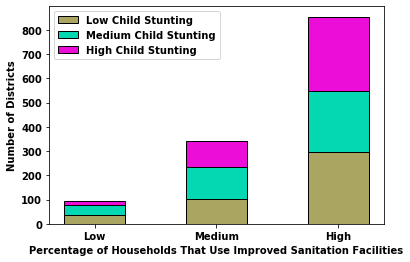

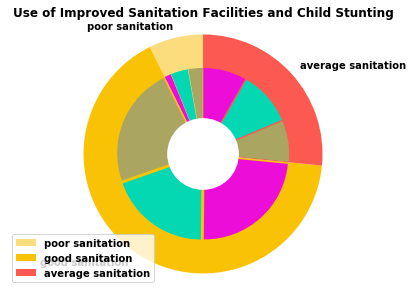

In [135]:
# Stacked bar plot
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low','High','Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Households That Use Improved Sanitation Facilities", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved sanitation facilities",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot1.png')
# Show graphic
plt.show()



# Nested pie chart
labels=['poor sanitation', 'good sanitation','average sanitation']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['xkcd:wheat', 'xkcd:goldenrod', 'xkcd:coral']
colors_region = ['xkcd:khaki','xkcd:aquamarine','xkcd:fuchsia',
                'xkcd:khaki','xkcd:aquamarine','xkcd:fuchsia',
                'xkcd:khaki','xkcd:aquamarine','xkcd:fuchsia']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc=3)
plt.title("Use of Improved Sanitation Facilities and Child Stunting", weight='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot2.png')
plt.show()




## 2.4 Clustering on the basis of drinking water source in household

In [136]:

df_cluster_1 = df_normalised[['7. Households with an improved drinking-water source1 (%)'] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [137]:
print(cluster_centers)


[[-2.6235126024710076], [0.5717912106431945], [-0.6970145675059671]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low , high and medium  % households having improved water sources**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [138]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.37894736842105264
0.45263157894736844
0.16842105263157894
C1
0.3477751756440281
0.29508196721311475
0.35714285714285715
C2
0.29737609329446063
0.39067055393586003
0.3119533527696793


Of all the districts that belong to cluster 1 (corresponding to low % of households having acces to improved drinking water sources), 37.8% have 'low' stunting rates, and 16.8 have 'high' stunting rates. Additionally, of all the districts that belong to  cluster 2,(corresponding to high % of households having acces to improved drinking water sources), 34.7% have 'low' stunting rates and 35.71% have 'high' % of children that are stunted .

**Thus, there is no evidence of any sort of a relationship between improved drinking water sources and child stunting**

<br>

**Children with access to improved sanitation but not improved water are at lower risk of stunting compared to children without access**


In [139]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

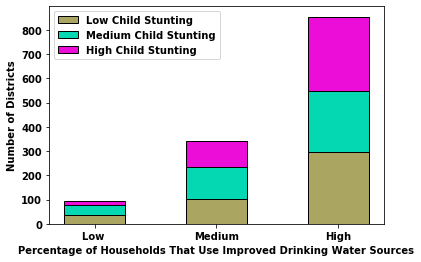

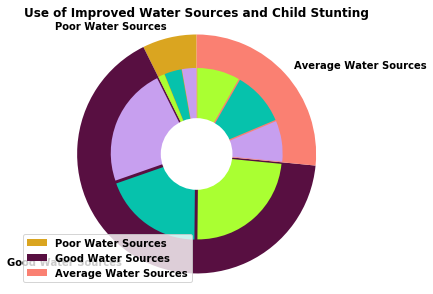

In [140]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low ','High','Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Households That Use Improved Drinking Water Sources", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot3.png')
# Show graphic
plt.show()







################################### NESTED PIE CHART########################################
labels=[ 'Poor Water Sources','Good Water Sources','Average Water Sources']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['goldenrod', 'xkcd:plum', 'salmon']
colors_region = ['xkcd:lavender','xkcd:turquoise','xkcd:lime',
                 'xkcd:lavender','xkcd:turquoise','xkcd:lime',
                 'xkcd:lavender','xkcd:turquoise','xkcd:lime']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.title("Use of Improved Water Sources and Child Stunting", weight ='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot4.png')
plt.show()

## 2.5 Clustering on the basis of clean fuel use in household

In [141]:

df_cluster_1 = df_normalised[['9. Households using clean fuel for cooking3 (%)'] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [142]:
print(cluster_centers)


[[-0.7433800439567382], [1.772400332730478], [0.4188600524347171]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low , high and medium  % households using clean fuel for cooking**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)

In [143]:
dfC0 = df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1.loc[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.14522821576763487
0.35408022130013833
0.5006915629322268
C1
0.6742081447963801
0.25339366515837103
0.07239819004524888
C2
0.5201149425287356
0.33620689655172414
0.14367816091954022


It is clear of all the districts that belong to cluster 0 (corresponding to low % of households using clean fuel ), 50% have 'high' stunting rates, and 14.5% have 'low' stunting rates. On the other hand, of all the districts that belong to  cluster 1,(corresponding to high % of households using clean fuel use), 67.4% have 'low' stunting rates and ONLY 7.2% have 'high' % of children that are stunted .

**We can therefore conclude that clean fuel use in household can prevent stunting**


In [144]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

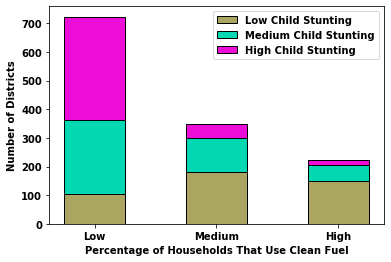

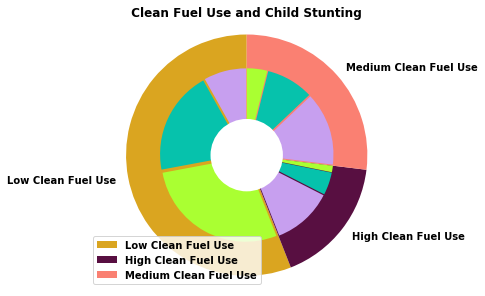

In [146]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low','High','Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Households That Use Clean Fuel", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nclean fuel",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot5.png')
# Show graphic
plt.show()







################################### NESTED PIE CHART########################################
labels=[ 'Low Clean Fuel Use','High Clean Fuel Use', 'Medium Clean Fuel Use']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['goldenrod', 'xkcd:plum', 'salmon']
colors_region = ['xkcd:lavender','xkcd:turquoise','xkcd:lime',
                 'xkcd:lavender','xkcd:turquoise','xkcd:lime',
                 'xkcd:lavender','xkcd:turquoise','xkcd:lime']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.title(" Clean Fuel Use and Child Stunting ", weight ='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot6.png')
plt.show()

## 2.6 clustering on the basis of breastfeeding practises

In [147]:

df_cluster_1 = df_normalised[['62. Children under age 3 years breastfed within one hour of birth8 (%)']]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [148]:
print(cluster_centers)


[[0.07193102652501725], [-1.0177266579405448], [1.3438792859869901]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium , low and high % of children breastfed within an hour of birth**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [149]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.4110169491525424
0.3326271186440678
0.2563559322033898
C1
0.19126819126819128
0.33264033264033266
0.4760914760914761
C2
0.43952802359882004
0.3303834808259587
0.23008849557522124


**It is clear of all the points that belong to cluster 1 (corresponding to low % of children breastfed within an hour of birth), 47% have 'high' stunting rates. On the other hand, of all the points that belong to  cluster 2,(corresponding to low % of children breastfed within an hour of birth), 44% have 'low' stunting rates.**

**We can therefore conclude that early initiation to breastfeeding can prevent stunting in children.**



In [150]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

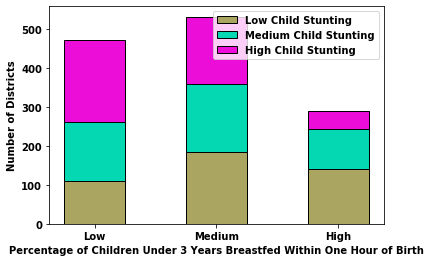

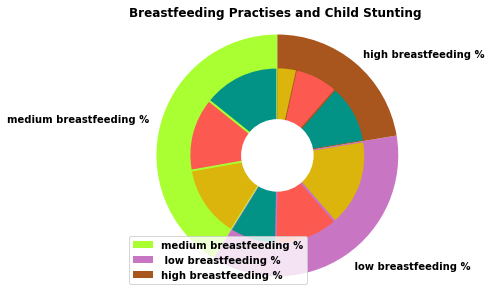

In [180]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,0,2]
 
# Names of group and bar width
names = ['Medium','Low','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Children Under 3 Years Breastfed Within One Hour of Birth", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households where \nchildren were breastfed \nwithin an hour of birth",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot7.png')
# Show graphic
plt.show()



##################### NESTED PIE PLOT###############################################

labels=['medium breastfeeding %', ' low breastfeeding %','high breastfeeding %']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['xkcd:lime', 'xkcd:orchid', 'xkcd:sienna']
colors_region = ['xkcd:teal','xkcd:coral','xkcd:gold',
                 'xkcd:teal','xkcd:coral','xkcd:gold',
                 'xkcd:teal','xkcd:coral','xkcd:gold']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc=3)
plt.title("Breastfeeding Practises and Child Stunting ",weight='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot8.png')
plt.show()

## 2.7 clustering on the basis of women literacy


In [154]:

df_cluster_1 = df_normalised[['12. Women who are literate (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [155]:
print(cluster_centers)


[[-1.3232860594649198], [1.074442247416933], [-0.062328907620908425]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, high, medium % of women literacy**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [156]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.03625377643504532
0.2628398791540785
0.7009063444108762
C1
0.6712328767123288
0.2557077625570776
0.0730593607305936
C2
0.24665391969407266
0.4397705544933078
0.3135755258126195


**It is clear of all the points that belong to cluster 0 (corresponding to 'low' % literacy and education levels 0f women),70.09% have 'high' stunting rates, and ONLY 3.6% have 'low' stunting rates. On the other hand, of all the points that belong to  cluster 1,(corresponding to 'high' % of literacy and education levels), 67.1% have 'low' stunting rates and ONLY 7.3% have 'high' stunting rates.**

**We can therefore conclude that there is a strong association between literacy and education levels of women and child stunting**



In [157]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

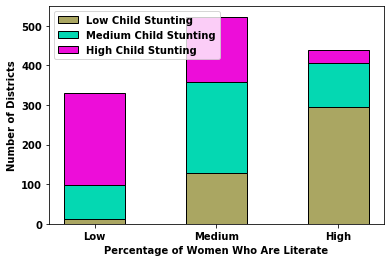

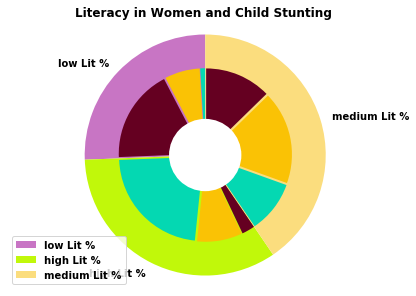

In [158]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low','High','Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women Who Are Literate", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of women who are literate",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot9.png') 
# Show graphic
plt.show()
########################################### NESTED PIE CHART##################################################


labels=['low Lit %', 'high Lit %','medium Lit %']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['xkcd:orchid', 'xkcd:chartreuse', 'xkcd:wheat']
colors_region = ['xkcd:aquamarine', 'xkcd:goldenrod','xkcd:maroon',
                 'xkcd:aquamarine', 'xkcd:goldenrod','xkcd:maroon',
                'xkcd:aquamarine', 'xkcd:goldenrod','xkcd:maroon']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc=3)
plt.title("Literacy in Women and Child Stunting ", weight='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot10.png')
plt.show()

## 2.8 Clustering on the basis of Women BMI 

In [159]:

df_cluster_1 = df_normalised[['72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [160]:
print(cluster_centers)


[[1.1349147032809994], [-1.149341355867153], [0.013135183686508841]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having high, low, medium % of women having below normal BMI**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [161]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.03836930455635491
0.3213429256594724
0.6402877697841727
C1
0.6786570743405276
0.2637889688249401
0.05755395683453238
C2
0.29694323144104806
0.4039301310043668
0.29912663755458513


**It is clear of all the points that belong to cluster 0 (corresponding to 'high' % of women having below normal BMI ), 64% have 'high' stunting rates, and ONLY 3.8% have 'low' stunting rates. On the other hand, of all the points that belong to cluster 1 (corresponding to 'low' % of women having below normal BMI ), 67.8% have 'low' stunting rates, and ONLY 5.7% have 'high' stunting rates. 
**We can therefore conclude that there is a strong association between mother's nutritional health (BMI) and stunting in children**



In [162]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

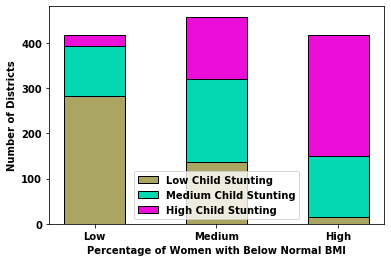

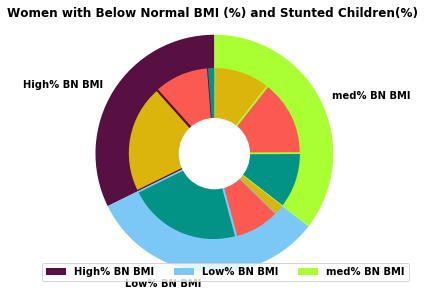

In [164]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [2,0,1]
 
# Names of group and bar width
names = ['High','Low', 'Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women with Below Normal BMI", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of women who are literate",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot11.png')
# Show graphic
plt.show()






#######################NESTED PIE CHART ##################
labels=['High% BN BMI','Low% BN BMI', 'med% BN BMI']           
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['xkcd:plum','xkcd:lightblue','xkcd:lime']
colors_region = ['xkcd:teal','xkcd:coral','xkcd:gold',
                 'xkcd:teal','xkcd:coral','xkcd:gold',
                 'xkcd:teal','xkcd:coral','xkcd:gold']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc=4, ncol=3)
plt.title("Women with Below Normal BMI (%) and Stunted Children(%) ", weight='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot12.png')
plt.show()

## 2.9 Clustering on the basis of % of Women who consumed iron folic acid during pregnancy

In [165]:

df_cluster_1 = df_normalised[['32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [166]:
print(cluster_centers)


[[-0.8737391182973068], [1.5335891255723677], [0.3524566880201994]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, high, medium % of women who consumed iron folic acid during pregnancy**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [167]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.16045380875202594
0.34035656401944897
0.4991896272285251
C1
0.6901960784313725
0.2235294117647059
0.08627450980392157
C2
0.38095238095238093
0.38571428571428573
0.23333333333333334


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of women who consumed iron folic acid during pregnancy ), 69.01% have 'low' stunting rates, and ONLY 8.62% have 'high' stunting rates. 
**We can therefore conclude that there is a strong association between mother's nutritional health during pregnancy and stunting in children**



In [168]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

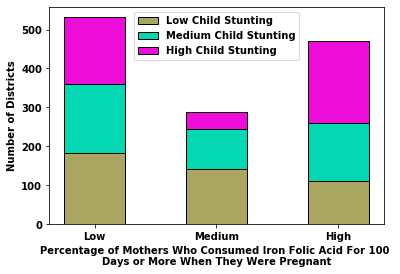

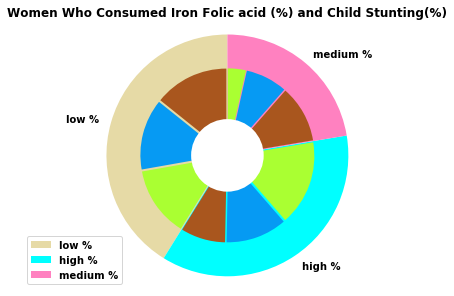

In [182]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low',  'High','Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Mothers Who Consumed Iron Folic Acid For 100 \nDays or More When They Were Pregnant", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot13.png', bbox_inches='tight') 
# Show graphic
plt.show()






####################Nested pie plot############################################
labels=['low %',  'high %','medium %']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['xkcd:beige','xkcd:cyan','xkcd:pink']
colors_region = ['xkcd:sienna','xkcd:azure','xkcd:lime',
                 'xkcd:sienna','xkcd:azure','xkcd:lime',
                'xkcd:sienna','xkcd:azure','xkcd:lime']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend( loc=3)
plt.title("Women Who Consumed Iron Folic acid (%) and Child Stunting(%)", weight='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot14.png')
plt.show()

## 2.10 Clustering on the basis of % of Women who are anaemic

In [170]:

df_cluster_1 = df_normalised[['79. All women age 15-49 years who are anaemic (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [171]:
print(cluster_centers)


[[-0.11988625306067659], [1.0006524760437492], [-1.4101308982294665]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium, high, low % of women who are anemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [172]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.3458646616541353
0.32894736842105265
0.325187969924812
C1
0.23354564755838642
0.3205944798301486
0.445859872611465
C2
0.48788927335640137
0.356401384083045
0.15570934256055363


**It is clear of all the points that belong to cluster 2 (corresponding to 'low' % of women who are anaemic), 48.6% have 'low' stunting rates, and 15.5% have 'high' stunting rates. 
**We can therefore conclude that anemia in women is not as indicative of stunting in children as other factors like sanitation.**



In [173]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

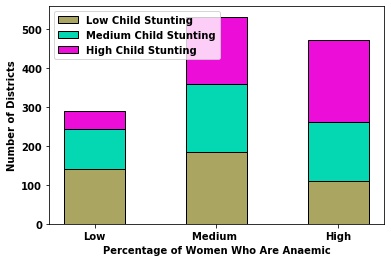

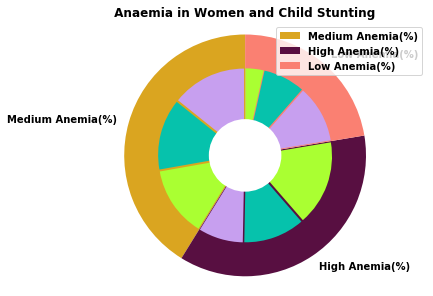

In [176]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,2,0]
 
# Names of group and bar width
names = ['Medium ','High','Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15.png') 
# Show graphic
plt.show()







################################### NESTED PIE CHART########################################
labels=['Medium Anemia(%)', 'High Anemia(%)','Low Anemia(%)']
sizes =[df11['cluster labels'].value_counts().values.mean(),
        df21['cluster labels'].value_counts().values.mean(),
        df31['cluster labels'].value_counts().values.mean()]
labels_region = ['low','medium','high','low','medium','high','low','medium','high']
sizes_contr = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
               dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
colors = ['goldenrod', 'xkcd:plum', 'salmon']
colors_region = ['xkcd:lavender','xkcd:turquoise','xkcd:lime',
                 'xkcd:lavender','xkcd:turquoise','xkcd:lime',
                 'xkcd:lavender','xkcd:turquoise','xkcd:lime']
explode = (0,0,0) 
explode_region = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_contr,colors=colors_region,startangle=90, explode=explode_region,radius=3.5)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.title(" Anaemia in Women and Child Stunting ", weight ='bold')
plt.savefig('./../Plots/RESULT PLOTS/plot16.png')
plt.show()

# 3. Association Rule Mining to identify factors that affect child stunting

In [184]:
df_apriori = pd.read_csv('./../Data/working_data/equal_frequency_discretised_data_7.csv')
df_apriori.drop(df_apriori.columns[[0]], axis = 1, inplace = True) 
df_apriori = df_apriori[['1. Population (female) age 6+ years who ever attended school (%)' , 
 '8. Households using improved sanitation facility2 (%)' , 
 '9. Households using clean fuel for cooking3 (%)' ,
 '12. Women who are literate (%)',
 '13. Men who are literate (%)' , 
 '62. Children under age 3 years breastfed within one hour of birth8 (%)',
 '65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)',
 '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
 '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
 '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
 '79. All women age 15-49 years who are anaemic (%)',
 '14. Women with 10 or more years of schooling (%)',
 '15. Women age 20-24 years married before age 18 years (%)',
 '19. Any modern method (%)',
 '30. Mothers who had at least 4 antenatal care visits (%)',
 '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
 '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
                         '68. Children under 5 years who are stunted11 (%)'
                        ]]

In [61]:
df_apriori = df_apriori.drop(columns = ['1. Population (female) age 6+ years who ever attended school (%)' , '14. Women with 10 or more years of schooling (%)','65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)' ,'76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)', '79. All women age 15-49 years who are anaemic (%)','30. Mothers who had at least 4 antenatal care visits (%)' , '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'])

In [62]:
cols = df_apriori.columns
df_apriori = df_apriori.values
df_apriori = df_apriori.tolist()

## 3.1 Conversion of categorical attributes into a suitable input for association rule mining (assymetric binary attributes)

each attribute will be converted from attribute_name to attribute_name - low , attribute_name - med , attribute_name - high

In [63]:
for row in df_apriori:
  for i in range(len(row)):
    row[i] = cols[i] + ' ' + row[i]

## 3.2 Implementation of Association Rule Mining (Using Apriori Algorithm)

In [64]:
# Functions to perform associarion rule mining
def GetRecords(dfApriori):

  for listt in dfApriori:
      recordToYield = frozenset(listt)  
      yield recordToYield

dfApriori = df_apriori
records_ = GetRecords(dfApriori)
print(type(records_))
print(records_)

import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
   
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
       
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
   
    itemSet, transactionList = getItemSetTransactionList(data_iter)
    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules
    #C-1 itemset
    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)
    #freq-1 itemset
    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            return float(freqSet[item])/len(transactionList)

            
#largeSet dict contains the freq Itemsets
    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in largeSet.items():
      if not key==0:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


<class 'generator'>
<generator object GetRecords at 0x1c20541350>


**We mined association rules which satisfied a support threshold of 0.15 and confidence threshold of 0.6**

In [65]:
items_, rules_ = runApriori(records_, 0.15, 0.60)


## 3.3 Frequent Itemsets (Support > 0.15) containing the attribute '% of Children under 5 years who are stunted- high'

In [66]:
for complete_tuple in items_:
    itemset = complete_tuple[0]
    if('68. Children under 5 years who are stunted11 (%) high' in itemset):
        print(complete_tuple)
        print("\n\n")

(('68. Children under 5 years who are stunted11 (%) high',), 0.33126934984520123)



(('68. Children under 5 years who are stunted11 (%) high', '8. Households using improved sanitation facility2 (%) low'), 0.228328173374613)



(('19. Any modern method (%) low', '68. Children under 5 years who are stunted11 (%) high'), 0.16718266253869968)



(('68. Children under 5 years who are stunted11 (%) high', '9. Households using clean fuel for cooking3 (%) low'), 0.19272445820433437)



(('62. Children under age 3 years breastfed within one hour of birth8 (%) low', '68. Children under 5 years who are stunted11 (%) high'), 0.1586687306501548)



(('13. Men who are literate (%) low', '68. Children under 5 years who are stunted11 (%) high'), 0.19582043343653252)



(('67. Total children age 6-23 months receiving an adequate diet9 10 (%) low', '68. Children under 5 years who are stunted11 (%) high'), 0.1609907120743034)



(('15. Women age 20-24 years married before age 18 years (%) high', '68. Ch

## 3.4 Association Rules (Confidence > 0.6) containing the attribute '% of Children under 5 years who are stunted- high' as its consequent (post condition)

In [67]:
for complete_tuple in rules_:
    rule = complete_tuple[0]
    antecedent = rule[0]
    consequent = rule[1] 
    if('68. Children under 5 years who are stunted11 (%) high' in consequent and len(consequent)==1):
        print(str(antecedent)+' ---> '+str(consequent))
        conf = complete_tuple[1]
        print('CONFIDENCE is: '+str(conf))
        print("\n\n")

('8. Households using improved sanitation facility2 (%) low',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6844547563805103



('72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%) high',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6325581395348837



('12. Women who are literate (%) low',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6473317865429233



('15. Women age 20-24 years married before age 18 years (%) high', '12. Women who are literate (%) low') ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6877076411960132



('13. Men who are literate (%) low', '8. Households using improved sanitation facility2 (%) low') ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.7626459143968872



('8. Households using improved sanitation facility2 (%) low', '9. Households using clean fuel for cooki